In this notebook, we will process the `overlap` results and choose the data IDs that we will be using in our experiments.

In [1]:
import pandas as pd

Load the `overlap` results.

See: https://github.com/kchristidis/overlap

In [2]:
df_overlap = pd.read_csv('02-segments-overlap.csv')

In [3]:
df_overlap.head()

,overlap_length,overlap_start,overlap_end,segment_count,segment_list
0,26956800,1359093600,1386050400,139,"1103,1153,1169,1185,1192,1283,1464,1508,1601,1..."
1,25466400,1359093600,1384560000,139,"1103,1153,1169,1185,1192,1283,1464,1508,1601,1..."
2,22788000,1359093600,1381881600,139,"1103,1153,1169,1185,1192,1283,1464,1508,1601,1..."
3,153120180,1359093600,1512213780,36,"1103,1185,1642,1714,2129,2470,2980,3036,3527,3..."
4,134503200,1359093600,1493596800,113,"1103,1169,1185,1192,1642,1697,171,1714,1718,17..."


We need to identify *significant* overlaps.

We define significance in terms of `overlap_length` and `segment_count`.

Convert `overlap_length` from seconds to years.

See:
https://stackoverflow.com/a/12605055/2363529
https://stackoverflow.com/a/38900352/2363529

In [4]:
df_overlap['overlap_length'] = df_overlap['overlap_length'].apply(lambda x: x/(60*60*8760))

In [5]:
df_overlap.rename(columns={'overlap_length': 'overlap_length_yrs'}, inplace=True)

In [6]:
df_overlap.head()

,overlap_length_yrs,overlap_start,overlap_end,segment_count,segment_list
0,0.854795,1359093600,1386050400,139,"1103,1153,1169,1185,1192,1283,1464,1508,1601,1..."
1,0.807534,1359093600,1384560000,139,"1103,1153,1169,1185,1192,1283,1464,1508,1601,1..."
2,0.722603,1359093600,1381881600,139,"1103,1153,1169,1185,1192,1283,1464,1508,1601,1..."
3,4.855409,1359093600,1512213780,36,"1103,1185,1642,1714,2129,2470,2980,3036,3527,3..."
4,4.265068,1359093600,1493596800,113,"1103,1169,1185,1192,1642,1697,171,1714,1718,17..."


Can we identify the significant overlaps?

In [7]:
df_overlap.sort_values(by=['segment_count', 'overlap_length_yrs'], ascending=[False, False]).head()

,overlap_length_yrs,overlap_start,overlap_end,segment_count,segment_list
11210,0.040980,1425708000,1427000340,207,"1103,114,1153,1169,1185,1192,1283,1415,1508,16..."
11188,0.066779,1425708000,1427813940,206,"1103,114,1169,1185,1192,1283,1415,1508,1642,16..."
21465,0.046459,1425535200,1427000340,206,"1103,114,1153,1169,1185,1192,1283,1415,1508,16..."
25852,0.025799,1427000340,1427813940,206,"1103,114,1169,1185,1192,1283,1415,1508,1642,16..."
21408,0.005479,1425535200,1425708000,206,"1103,114,1153,1169,1185,1192,1283,1415,1508,16..."


This doesn't get us anywhere useful.

We need to filter.

At a minimum, we would like a 2-year overlap consisting of at least 100 segments. (This is an arbitrary choice.)

In [8]:
choose_duration_min = df_overlap['overlap_length_yrs'] >= 2
choose_duration_max = df_overlap['overlap_length_yrs'] <= 2.1
choose_count_min = df_overlap['segment_count'] >= 100
choose_count_max = df_overlap['segment_count'] <= 110

In [9]:
df_filtered = df_overlap[choose_duration_min & choose_duration_max & choose_count_min & choose_count_max]

In [10]:
df_filtered.head()

,overlap_length_yrs,overlap_start,overlap_end,segment_count,segment_list
1431,2.099315,1348790400,1414994400,100,"1103,1169,1185,1192,1283,1642,1697,171,1714,17..."
1537,2.065752,1348790400,1413935940,101,"1103,1169,1185,1192,1283,1601,1642,1697,171,17..."
1615,2.082190,1348790400,1414454340,101,"1103,1169,1185,1192,1283,1601,1642,1697,171,17..."
4146,2.019863,1351296000,1414994400,108,"1103,1169,1185,1192,1283,1642,1697,171,1714,17..."
4315,2.002738,1351296000,1414454340,109,"1103,1169,1185,1192,1283,1601,1642,1697,171,17..."


Now we're getting somewhere.

Sort.

In [11]:
df_filtered.sort_values(by=['overlap_length_yrs', 'segment_count'], ascending=[True, True]).head()

,overlap_length_yrs,overlap_start,overlap_end,segment_count,segment_list
26851,2.002738,1350777600,1413935940,105,"1103,1169,1185,1192,1283,1601,1642,1697,171,17..."
4315,2.002738,1351296000,1414454340,109,"1103,1169,1185,1192,1283,1601,1642,1697,171,17..."
10368,2.005478,1350691200,1413935940,104,"1103,1169,1185,1192,1283,1601,1642,1697,171,17..."
24053,2.005478,1351209600,1414454340,108,"1103,1169,1185,1192,1283,1601,1642,1697,171,17..."
27012,2.006579,1448927940,1512207420,110,"1103,1169,1185,1415,1642,1697,1714,1718,1792,2..."


Any row in here will do for our work.

Persist the dataframe to disk.

In [12]:
df_filtered.to_csv('03-segments-overlap-filtered.csv')

Before proceeding, we need to confirm graphically that there is indeed overlap.

Pick the last row of the dataframe.

See: https://stackoverflow.com/a/36542308/2363529

In [13]:
chosen_record = df_filtered.iloc[-1]

In [14]:
chosen_record

overlap_length_yrs                                              2.05595
overlap_start                                                1351086720
overlap_end                                                  1415923140
segment_count                                                       106
segment_list          1103,1169,1185,1192,1283,1642,1697,171,1714,17...
Name: 32545, dtype: object

For each of the data IDs in the `segment_list`, extract their `egauge_min_time` and `egauge_max_time` from the dataframe of candidate records (refer to the first notebook in the series).

In [15]:
chosen_record.segment_list

'1103,1169,1185,1192,1283,1642,1697,171,1714,1718,1792,187,2072,2094,2129,2199,2233,2335,2337,2470,2755,2814,2818,2864,2925,2945,2965,2980,2986,3036,3134,3192,3224,3456,3527,3544,3635,370,3719,3723,3918,3935,3967,4154,4193,4302,4357,4373,4447,4526,4767,4957,5129,5218,5246,5275,5357,5403,5439,545,5615,5738,5785,5796,5817,585,5892,5972,6121,6139,6266,6423,6643,6871,6990,7016,7108,7429,744,7510,7627,7731,7739,7767,7800,7850,7863,7989,8084,8155,8419,861,8626,8669,8829,8890,890,8967,9019,9052,9121,9160,9631,9729,9737,9982'

In [16]:
type(chosen_record.segment_list)

str

In [17]:
chosen_list = chosen_record.segment_list.split(",")

In [18]:
len(chosen_list)

106

In [19]:
df_candidate = pd.read_csv('01-segments-candidate.csv')

In [20]:
df_candidate.head()

,dataid,city,building_type,total_square_footage,house_construction_year,egauge_min_time,egauge_max_time
0,26,Austin,Single-Family Home,2075.0,2008.0,2012-11-03 00:00:00,2017-12-02 09:59:00
1,77,Austin,Single-Family Home,2669.0,2009.0,2014-06-06 05:00:00,2017-07-23 08:34:00
2,93,Austin,Single-Family Home,2934.0,1993.0,2012-12-09 00:00:00,2017-12-02 08:59:00
3,114,Austin,Single-Family Home,1842.0,2008.0,2013-10-16 00:00:00,2017-12-02 08:31:00
4,171,Austin,Single-Family Home,2376.0,2008.0,2012-05-03 00:00:00,2017-12-02 08:59:00


In [21]:
df_candidate_trimmed = df_candidate[['dataid', 'egauge_min_time', 'egauge_max_time']].set_index('dataid')

In [22]:
df_candidate_trimmed.head()

,egauge_min_time,egauge_max_time
dataid,,
26,2012-11-03 00:00:00,2017-12-02 09:59:00
77,2014-06-06 05:00:00,2017-07-23 08:34:00
93,2012-12-09 00:00:00,2017-12-02 08:59:00
114,2013-10-16 00:00:00,2017-12-02 08:31:00
171,2012-05-03 00:00:00,2017-12-02 08:59:00


In [23]:
df_chosen = df_candidate_trimmed[df_candidate_trimmed.index.isin(chosen_list)]

In [24]:
df_chosen.head()

,egauge_min_time,egauge_max_time
dataid,,
171,2012-05-03 00:00:00,2017-12-02 08:59:00
187,2012-05-16 00:00:00,2017-11-13 12:32:00
370,2012-07-11 05:00:00,2017-12-02 11:59:00
545,2012-08-13 00:00:00,2017-12-02 10:31:00
585,2012-01-01 06:00:00,2017-12-01 09:59:00


In [25]:
df_chosen.shape[0]

106

Time to plot.

In [26]:
df_chosen.dtypes

egauge_min_time    object
egauge_max_time    object
dtype: object

In [27]:
from datetime import datetime
x_min = datetime.fromtimestamp(chosen_record.overlap_start)
x_max = datetime.fromtimestamp(chosen_record.overlap_end)
[x_min, x_max]

[datetime.datetime(2012, 10, 24, 9, 52),
 datetime.datetime(2014, 11, 13, 18, 59)]

In [28]:
xs = zip(pd.to_datetime(df_chosen['egauge_min_time']), pd.to_datetime(df_chosen['egauge_max_time']))
ys = zip(df_chosen.index.values, df_chosen.index.values)

In [29]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


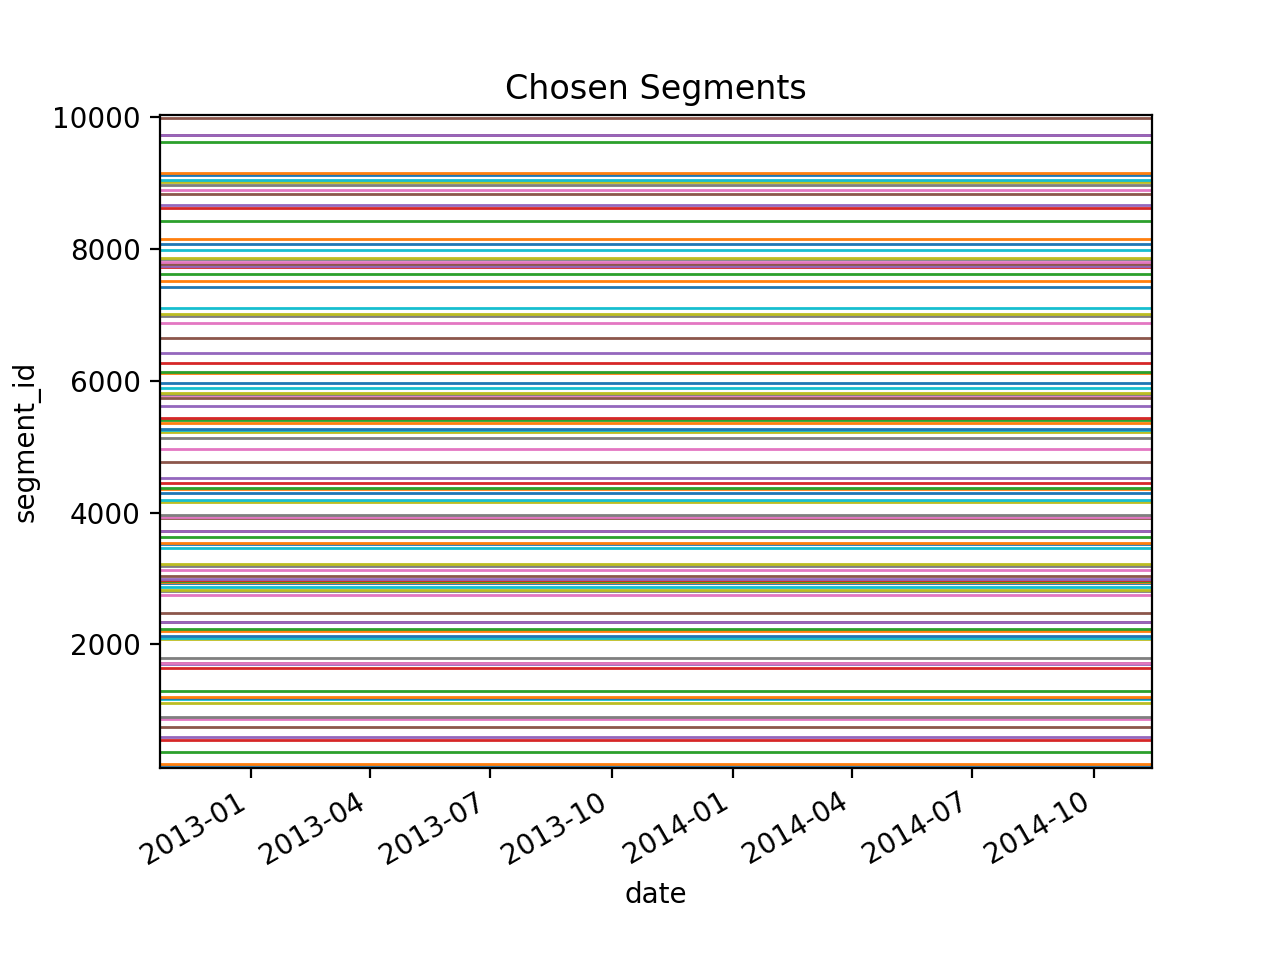

In [30]:
fig, ax = plt.subplots()
ax.set(xlabel='date', ylabel='data_id', title='eGauge traces for the chosen houses')
y_padding = 50
ax.set(ylim=[max([min(df_chosen.index.values-y_padding),0]), max(df_chosen.index.values+y_padding)])
ax.set(xlim=[x_min, x_max])

for x, y in zip(xs, ys):
    ax.plot(x, y, linewidth=1)
fig.autofmt_xdate() # from: https://pythonspot.com/en/plot-time-with-matplotlib/

In [31]:
fig.savefig('03-segments-chosen-plot.eps')